## **Breckenridge Temperature - Next 48 Hours**

In [ ]:
#@title
!pip install lxml
import pandas as pd
import numpy as np

#html_url = "https://forecast.weather.gov/MapClick.php?CityName=Breckenridge&state=CO&site=BOU&textField1=39.5075&textField2=-106.047&e=0#.YppuyOjMK70"
# Worked...but only pulled information I don't care about

html_url = "https://forecast.weather.gov/MapClick.php?lat=39.5075&lon=-106.047&lg=english&&FcstType=digital"

weather_tables = pd.read_html(html_url)

# Rows 1 and 18 contain relevant dates
weather = weather_tables[7]

# Create an array of the dates found in table
dates = weather.iloc[1][1:].dropna().unique()
dates = np.append(dates, weather.iloc[18][1:].dropna().unique())

# Finds first hour in data set
starting_hour = weather.iloc[2][1]

first_day=[]
second_day=[]
third_day=[]

# Amount of hours in first date
length = 24 - int(starting_hour)

# Store temps on first day.
for i in range(length):
  first_day.append(weather.iloc[3][i+1])

# Store temps on second day, first row in dataset
for i in range(24-length):
  second_day.append(weather.iloc[3][i+1+length])

# Store temps on second day, second row in dataset
for i in range(24-(24-length)):
  second_day.append(weather.iloc[20][i+1])

# Store temps on third day
for i in range(24-(24-(24-length))):
  third_day.append(weather.iloc[20][i+1+(24-(24-length))])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Breckenridge Temperature - Next 48 Hours



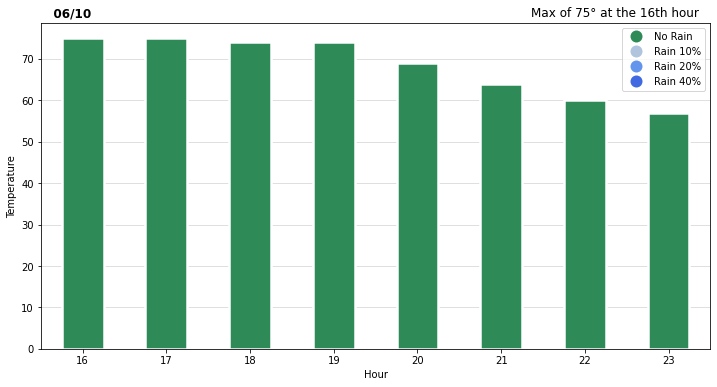

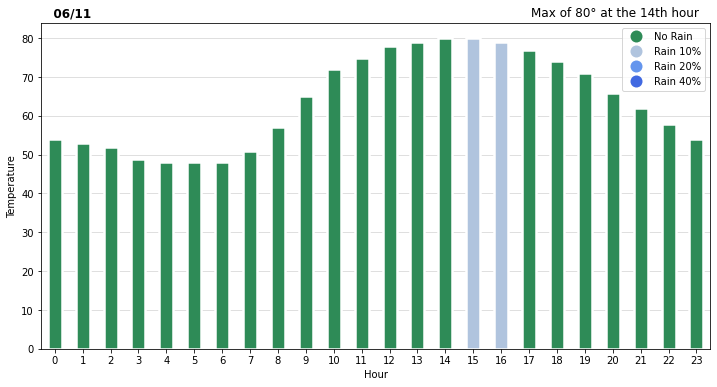

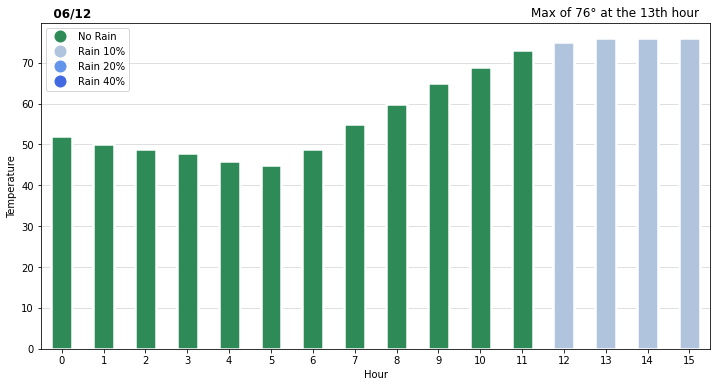

In [ ]:
#@title
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

print('Breckenridge Temperature - Next 48 Hours')
print('')

# Create a list of hours for first day and plot first day temps
hours = []
for i in range(24-(24-length)):
  hours.append(i+(24-length))

df = pd.DataFrame(columns=['Hour', 'Temp'])
df['Hour'] = hours
df['Temp'] = first_day

df['Hour'] = df['Hour'].astype(int)
df['Temp'] = df['Temp'].astype(int)

max = df['Temp'].max()
max_time = df['Temp'].idxmax() + (24-length)

# Will it rain?
rain = []
for i in range(length):
  rain.append(weather.iloc[10][i+1])

df['Rain'] = rain
df['Rain'] = df['Rain'].astype(int)

# Will it thunder?
thunder = []
for i in range(length):
  thunder.append(weather.iloc[13][i+1])

df['Thunder'] = thunder

edgecolor = ['goldenrod' if t in ['Chc'] else 'white' for t in df['Thunder']]
color = ['royalblue' if r>=40 else 'cornflowerblue' if r>=20 else 'lightsteelblue' if r>=10 else 'seagreen' for r in df['Rain']]

df.plot('Hour', 'Temp', kind='bar', figsize=(12,6), legend=None, color=color, edgecolor=edgecolor, linewidth=2.5, zorder=3).grid(axis='y', zorder=0, alpha=0.5)
plt.title('   '+dates[0], weight='bold', loc='left')
plt.title('Max of '+str(max)+'° at the '+str(max_time)+'th hour'+'   ', loc='right')
plt.xticks(rotation=0)
plt.ylabel('Temperature')

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['seagreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']]
plt.legend(legend_handles, ['No Rain', 'Rain 10%', 'Rain 20%', 'Rain 40%'])

# Create a list of hours for second day and plot second day temps
hours=[]
for i in range(24):
  hours.append(i)

df2 = pd.DataFrame(columns=['Hour', 'Temp'])
df2['Hour'] = hours
df2['Temp'] = second_day

df2['Hour'] = df2['Hour'].astype(int)
df2['Temp'] = df2['Temp'].astype(int)

max = df2['Temp'].max()
max_time = df2['Temp'].idxmax()

# Will it rain?
rain = []
for i in range(24-length):
  rain.append(weather.iloc[10][i+1+length])

for i in range(24-(24-length)):
  rain.append(weather.iloc[27][i+1])

df2['Rain'] = rain
df2['Rain'] = df2['Rain'].astype(int)

# Will it thunder?
thunder = []
for i in range(24-length):
  thunder.append(weather.iloc[13][i+1+length])

for i in range(24-(24-length)):
  thunder.append(weather.iloc[30][i+1])

df2['Thunder'] = thunder

edgecolor = ['goldenrod' if t in ['Chc'] else 'white' for t in df2['Thunder']]
color = ['royalblue' if r>=40 else 'cornflowerblue' if r>=20 else 'lightsteelblue' if r>=10 else 'seagreen' for r in df2['Rain']]

df2.plot('Hour', 'Temp', kind='bar', figsize=(12,6), legend=None, color=color, edgecolor=edgecolor, linewidth=2.5, zorder=3).grid(axis='y', zorder=0, alpha=0.5)
plt.title('   '+dates[1], weight='bold', loc='left')
plt.title('Max of '+str(max)+'° at the '+str(max_time)+'th hour'+'   ', loc='right')
plt.xticks(rotation=0)
plt.ylabel('Temperature')

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['seagreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']]
plt.legend(legend_handles, ['No Rain', 'Rain 10%', 'Rain 20%', 'Rain 40%'])

# Create a list of hours for third day and plot third day temps
hours=[]
for i in range(24-(24-(24-length))):
  hours.append(i)

df3 = pd.DataFrame(columns=['Hour', 'Temp'])
df3['Hour'] = hours
df3['Temp'] = third_day

df3['Hour'] = df3['Hour'].astype(int)
df3['Temp'] = df3['Temp'].astype(int)

max = df3['Temp'].max()
max_time = df3['Temp'].idxmax()

# Will it rain?
rain = []
for i in range(24-(24-(24-length))):
  rain.append(weather.iloc[27][i+1+(24-(24-length))])

df3['Rain'] = rain
df3['Rain'] = df3['Rain'].astype(int)

# Will it thunder?
thunder = []
for i in range(24-(24-(24-length))):
  thunder.append(weather.iloc[30][i+1+(24-(24-length))])

df3['Thunder'] = thunder

edgecolor = ['goldenrod' if t in ['Chc'] else 'white' for t in df3['Thunder']]
color = ['royalblue' if r>=40 else 'cornflowerblue' if r>=20 else 'lightsteelblue' if r>=10 else 'seagreen' for r in df3['Rain']]

df3.plot('Hour', 'Temp', kind='bar', figsize=(12,6), legend=None, color=color, edgecolor=edgecolor, linewidth=2.5, zorder=3).grid(axis='y', zorder=0, alpha=0.5)
plt.title('   '+dates[2], weight='bold', loc='left')
plt.title('Max of '+str(max)+'° at the '+str(max_time)+'th hour'+'   ', loc='right')
plt.xticks(rotation=0)
plt.ylabel('Temperature')

legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['seagreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']]
plt.legend(legend_handles, ['No Rain', 'Rain 10%', 'Rain 20%', 'Rain 40%'])